# 🏔 Plot model terrain

In [9]:
from herbie import Herbie
from herbie import paint
from herbie.toolbox import EasyMap, pc, ccrs

import matplotlib.pyplot as plt

## HRRR Model Terrain

In [2]:
H = Herbie("2022-01-01", product="sfc")
ds = H.xarray("(?:HGT|LAND):surface")
ds

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 46MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2022-01-01
    step                 timedelta64[ns] 8B 00:00:00
    surface              float64 8B 0.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2022-01-01
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    lsm                  (y, x) float32 8MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    orog                 (y, x) float32 8MB -0.01786 -0.01786 ... -0.01786
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/blaylock/data/hrrr/20220101/subset_04ef438...
    search:                  (?:HGT|LAND):surface

In [3]:
# We want to set the water points to nan
ds["orog"] = ds.orog.where(ds.lsm > 0)

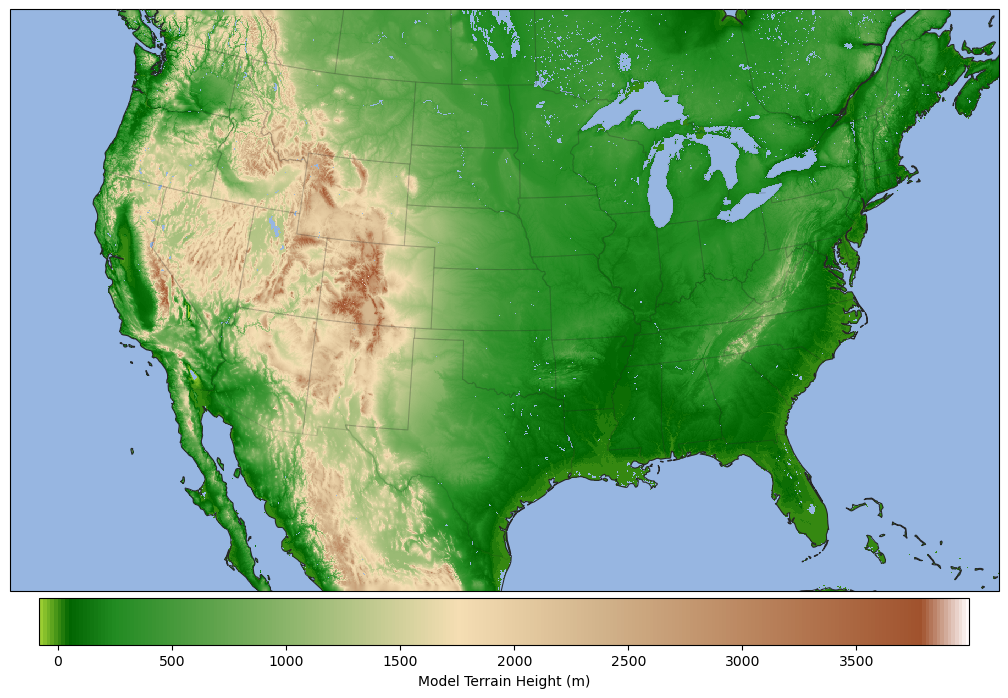

In [4]:
ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    cmap=paint.LandGreen.cmap,
)

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="Model Terrain Height (m)",
)

Adjusting the colormap for different color effects.

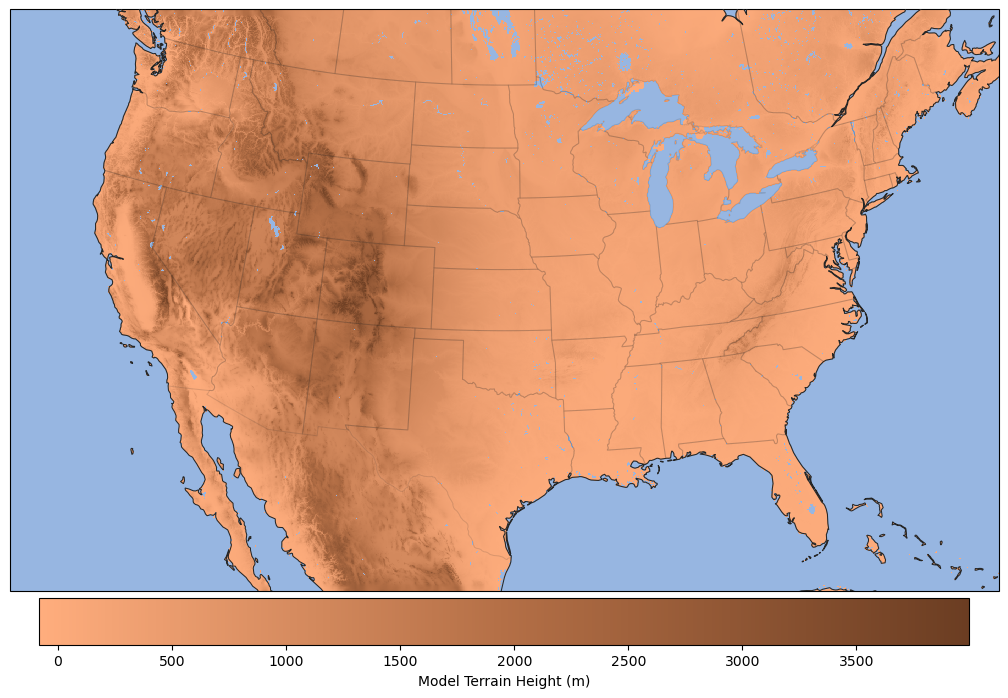

In [5]:
ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    cmap=paint.LandBrown.cmap,
)

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="Model Terrain Height (m)",
)

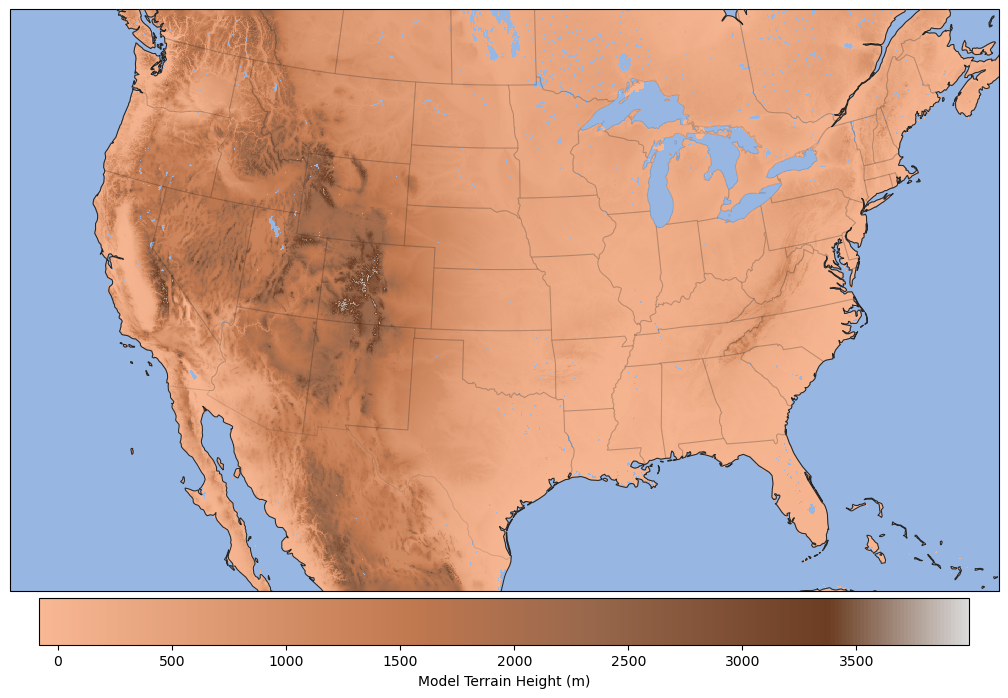

In [6]:
ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    cmap=paint.LandTan.cmap,
)

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="Model Terrain Height (m)",
)

## GFS Model Terrain

Herbie actually has a little shortcut to return the terrain fields with the water points masked out. (Might not work for all models).

In [7]:
H = Herbie("2022-01-01", model="gfs")
ds = H.terrain()
ds

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2022-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 8MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2022-01-01
    step                 timedelta64[ns] 8B 00:00:00
    surface              float64 8B 0.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time           datetime64[ns] 8B 2022-01-01
    gribfile_projection  object 8B None
Data variables:
    lsm                  (latitude, longitude) float32 4MB 0.0 0.0 ... 1.0 1.0
    orog                 (latitude, longitude) float32 4MB nan nan ... 2.775e+03
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gfs
    product:                 pgrb2.0p25
    description:             Global Forecast System
    remote_grib:             https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20...
    local_grib:              /home/blaylock/data/gfs/20220101/subset_04ef4f92...
    search:                  :(?:HGT|LAND):surface

TODO: Notice the warning... I need to find a better approach for wrapped plots...

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:315: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)


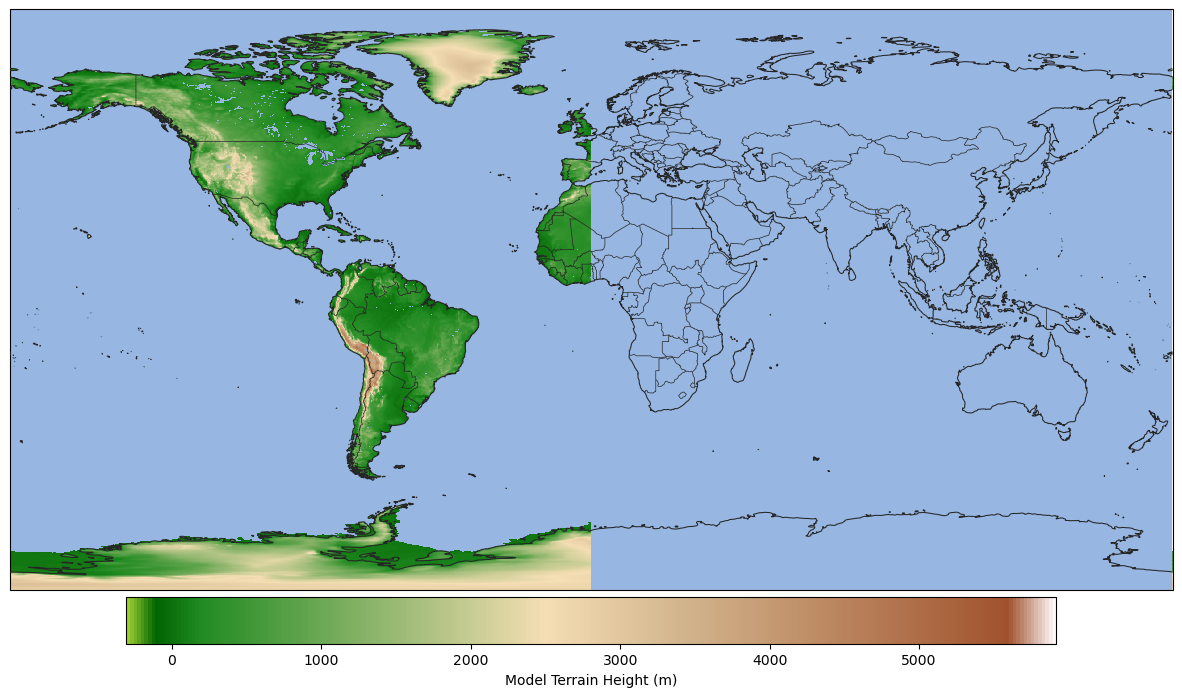

In [8]:
ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).BORDERS().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    cmap=paint.LandGreen.cmap,
)

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="Model Terrain Height (m)",
)

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:315: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)


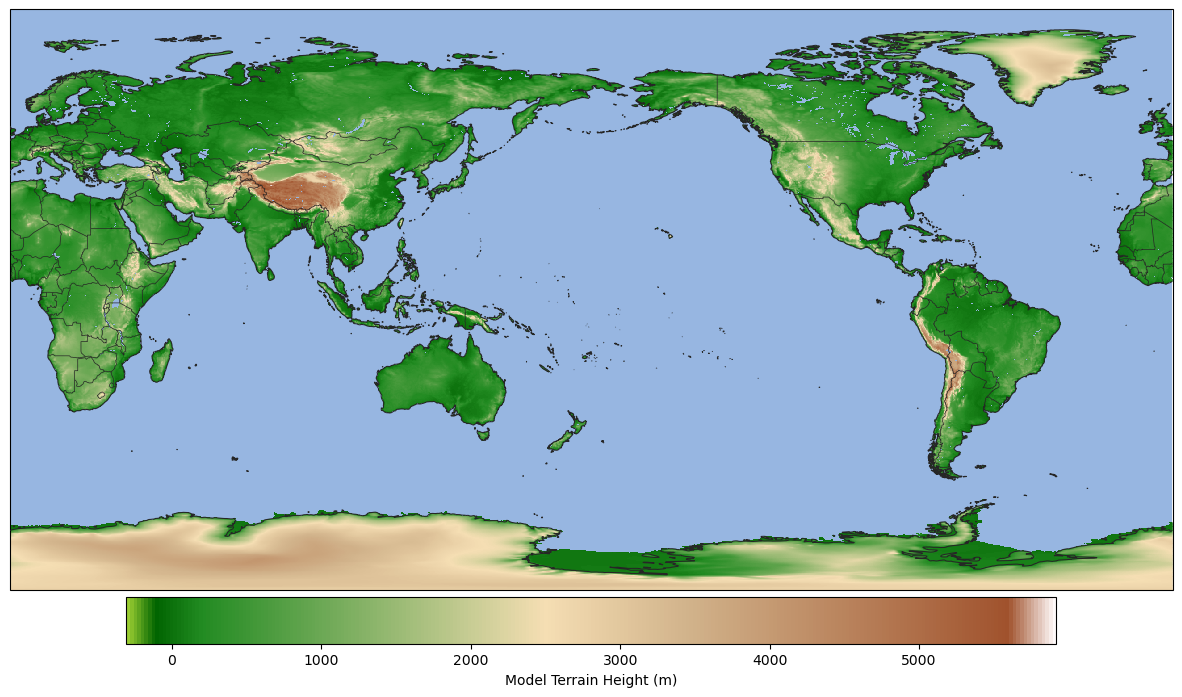

: 

In [11]:
ax = (
    EasyMap("50m", figsize=[15, 9], crs=ccrs.PlateCarree(central_longitude=-180))
    .BORDERS()
    .ax
)
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    cmap=paint.LandGreen.cmap,
)

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="Model Terrain Height (m)",
)